In this notebook we will discuss:
    
1) Cross-validation

2) Using ExtraTreesClassifier for feature selection.

### Cross-validation

Is a process to validate a model. The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

One round of cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the validation set or testing set). To reduce variability, in most methods multiple rounds of cross-validation are performed using different partitions, and the validation results are combined (e.g. averaged) over the rounds to give an estimate of the model's predictive performance.

References: https://en.wikipedia.org/wiki/Cross-validation_(statistics)#:~:text=Cross%2Dvalidation%2C%20sometimes%20called%20rotation,to%20an%20independent%20data%20set.

#### k-fold cross-validation

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. The advantage of this method over repeated random sub-sampling is that all observations are used for both training and validation, and each observation is used for validation exactly once. 

#### Explanation

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

k = 4, we want to make 4 groups or partitions

In each group will have 3 values

G1 - 1, 2, 3

G2 - 4, 5, 6

G3 - 7, 8, 9

G4 - 10, 11, 12

First iteration: G1, G2, G3 for training and G4 to CV

Second iteration: G2, G3, G4 for training and G1 for CV

Third iteration: G1, G3, G4 for training and G2 for CV

Fourth iteration: G1, G2, G4 for training and G3 for CV

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv("Titanic.csv")

In [15]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [16]:
print(df.shape)

(891, 12)


In [17]:
df["family_size"] = df["SibSp"] + df["Parch"] + 1

In [18]:
print(df["Parch"].head())
print("+++++++++++++")
print(df["SibSp"].head())

0    0
1    0
2    0
3    0
4    0
Name: Parch, dtype: int64
+++++++++++++
0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64


In [19]:
print(df["family_size"].head())

0    2
1    2
2    1
3    2
4    1
Name: family_size, dtype: int64


In [20]:
print(df["Embarked"].unique())

['S' 'C' 'Q' nan]


In [21]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
family_size      0
dtype: int64


In [22]:
df["Age"].fillna(value=df["Age"].median(), inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
family_size      0
dtype: int64

In [23]:
df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [25]:
df["Embarked"].fillna(value="S", inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
family_size      0
dtype: int64

In [26]:
embarked ={"S":0, "C":1, "Q":2}

In [27]:
df.Embarked = [embarked[item] for item in df.Embarked] # list comprehension

In [28]:
gender = {"female":1, "male":0}

In [29]:
df.Gender = [gender[item] for item in df.Gender]

In [51]:
print(df.Gender[0:5])

0    0
1    1
2    1
3    1
4    0
Name: Gender, dtype: int64


In [30]:
dfx = df[["Age", "Gender", "family_size", "Embarked"]].copy(deep=True)
dfy = df[["Survived"]].copy(deep=True)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
x = scaler.fit_transform(dfx)

In [32]:
y = dfy

In [33]:
print(x.shape)
print(y.shape)

(891, 4)
(891, 1)


In [34]:
import numpy
x = numpy.array(x)
y = numpy.array(y)

In [35]:
print(x.shape, y.shape)

(891, 4) (891, 1)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

from sklearn.model_selection import RepeatedKFold
scores_test = []
model = LogisticRegression(solver='lbfgs', penalty='l2', random_state=1)
rkf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(x):
    print("Train:", train_index, "Validation:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    #print(x_train.shape, x_test.shape)
    y_train, y_test = y[train_index], y[test_index]
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    
    #print(y_train.shape, y_test.shape)
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    scores_test.append(model.score(x_test, y_test))

Train: [  1   2   3   5   7   8   9  10  11  13  16  17  18  19  20  21  22  24
  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  60  61  62
  64  65  66  69  70  71  73  74  75  76  77  78  79  80  81  82  83  84
  85  90  94  96  97  98  99 100 101 104 105 107 108 109 110 111 113 114
 118 120 121 122 124 125 127 128 129 130 131 132 133 134 136 137 139 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 156 157 158 160 162
 163 164 166 167 168 169 171 172 173 174 176 177 178 179 180 181 182 183
 184 185 186 188 189 190 191 192 193 196 197 198 199 200 202 203 204 205
 206 208 209 211 213 214 215 217 220 221 222 224 226 227 228 229 230 231
 232 234 235 236 237 239 241 242 243 244 245 247 248 249 250 251 252 254
 255 257 258 260 263 264 265 266 267 268 269 270 271 272 273 274 275 277
 278 279 280 281 282 283 284 285 287 288 290 291 292 293 294 296 297 298
 299 300 302 303 308 309 311 312 313 314 315

In [39]:
print(scores_test)

[0.7877094972067039, 0.797752808988764, 0.8202247191011236, 0.7752808988764045, 0.7752808988764045]


In [40]:
scores_test = numpy.array(scores_test)
print(numpy.mean(scores_test))

0.7912497646098801


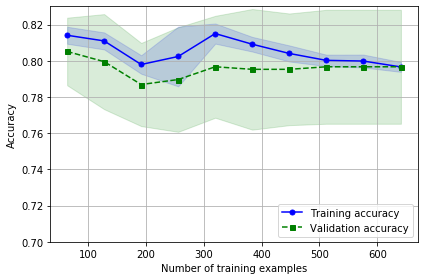

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(LogisticRegression(penalty='l2', random_state=1,
                                           solver='lbfgs', max_iter=10000))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                               X=x_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 0.83])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

### Extra Tree Classifier

Extra Trees is like Random Forest, in that it builds multiple trees and splits nodes using random subsets of features, but with two key differences: it does not bootstrap observations (meaning it samples without replacement), and nodes are split on random splits, not best splits. 

In [42]:
from sklearn.ensemble import ExtraTreesClassifier 

In [48]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, 
                                        criterion ='entropy', max_features = 2, random_state=2) 
  
# Training the model 
dfy = np.array(dfy).ravel()
extra_tree_forest.fit(dfx, dfy) 

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                     max_depth=None, max_features=2, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                     oob_score=False, random_state=2, verbose=0,
                     warm_start=False)

In [52]:
# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 

print(feature_importance)  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_], 
                                        axis = 0) 
# print(feature_importance_normalized)  # this might be optional

# "Age", "Gender", "family_size", "Embarked"

[0.4705246  0.33170388 0.15739352 0.040378  ]
[0.03111371 0.00480494 0.03389417 0.0072374 ]


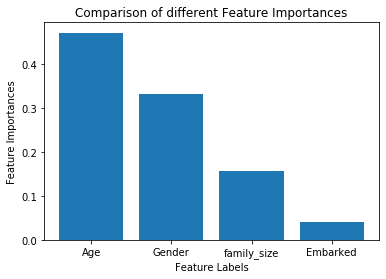

In [53]:
#plt.bar(dfx.columns, feature_importance_normalized) 
plt.bar(dfx.columns, feature_importance) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 